# 🫀 Heart Disease Prediction 

**Objective:** The goal of this project is to build a machine learning model capable of predicting the presence of heart disease based on medical attributes. 

## 1. Importing Libraries & Data Loading
In this section, we import the necessary data science libraries and load our dataset to take a first look at the data structure.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('/kaggle/input/datasets/johnsmith88/heart-disease-dataset/heart.csv')
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 2. Exploratory Data Analysis (EDA)
Here, we explore the data to understand the distribution of features, check for missing values, and analyze the correlation between different medical indicators and heart disease.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


/tmp/ipykernel_17/772157257.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


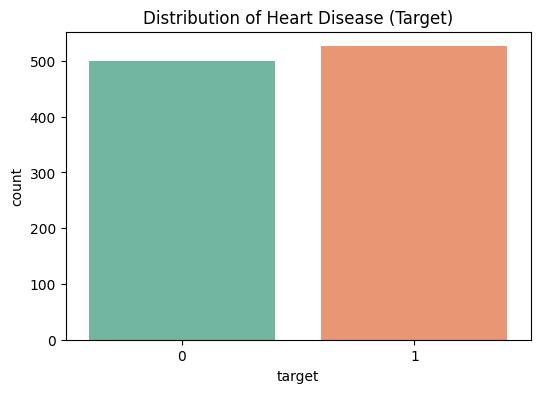

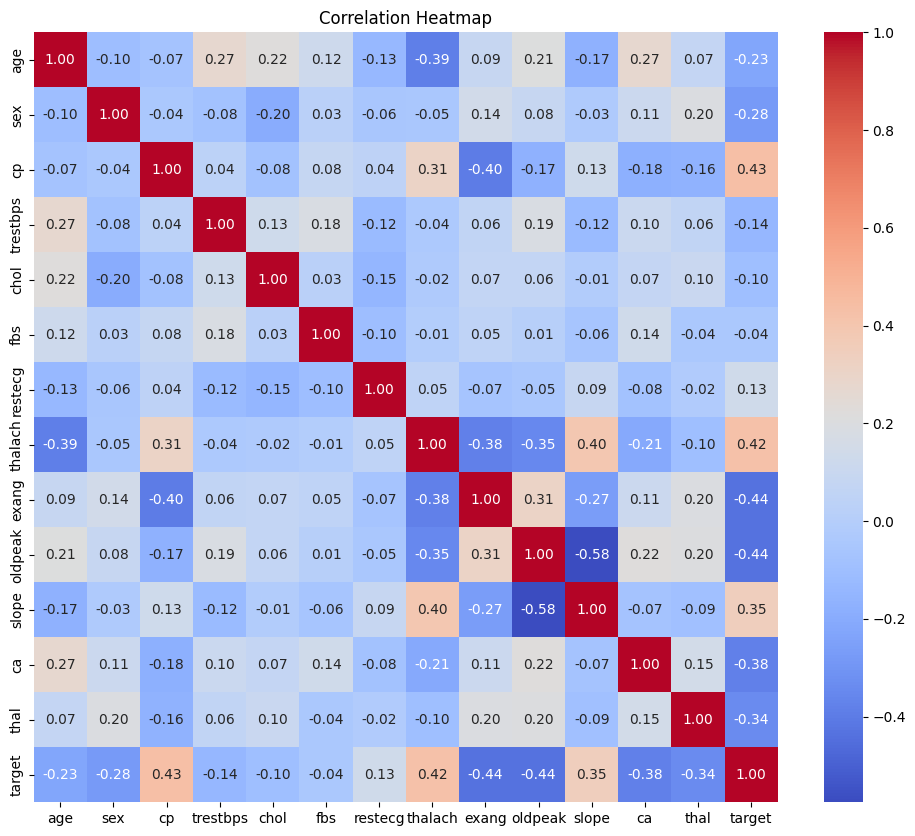

In [3]:
# Checking the values
print(df.isnull().sum())

# Target distribution diagram (infected vs. uninfected)
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Distribution of Heart Disease (Target)')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 3. Data Preprocessing
To ensure our machine learning models perform optimally, we need to:
1. Isolate the target variable (`target`) from the features.
2. Split the data into training (70%) and testing (30%) sets.
3. Standardize the features so they have a mean of 0 and a variance of 1.

In [4]:
# Data and Goal Separation
X = df.drop('target', axis=1)
y = df['target']

# Data segmentation (70% training - 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Model Training & Evaluation
We will train our Baseline Model using the **K-Nearest Neighbors (KNN)** algorithm. After training, we will evaluate its accuracy and review the classification report.

✅ Model Accuracy: 84.09%

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       159
           1       0.82      0.87      0.84       149

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308



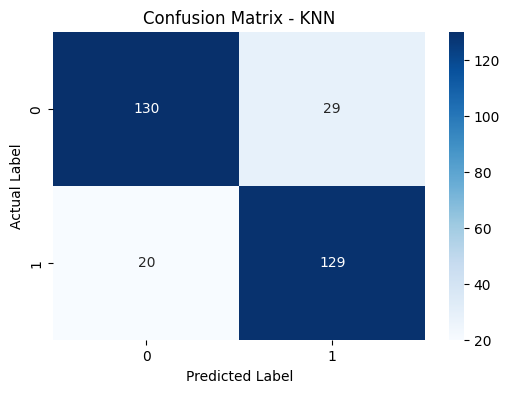

In [5]:
# KNN Model Preparation and Training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Making predictions
y_pred = knn.predict(X_test_scaled)

# Calculating accuracy and printing the report
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%\n")
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## 5. Conclusion 🏆
The baseline **KNN model** performed remarkably well, achieving an accuracy of **84.8%**. This demonstrates that the selected medical features are strong indicators for predicting heart disease. The data preprocessing steps, particularly feature scaling, played a crucial role in the model's performance.

# 🫀 Advanced Heart Disease Diagnostic System
**Project Level:** Professional / Data Science Portfolio

### 🛠️ Objective
Develop a high-precision diagnostic model for heart disease detection. We will go beyond basic models by implementing **Hyperparameter Tuning** and comparing multiple algorithms to ensure the highest **Recall** and **Accuracy**.

## 1. Environment Setup & Data Loading

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Tools
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

df = pd.read_csv('/kaggle/input/datasets/johnsmith88/heart-disease-dataset/heart.csv')
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 2. Professional Exploratory Data Analysis (EDA)
We analyze correlations and feature distributions to understand what drives heart disease predictions.

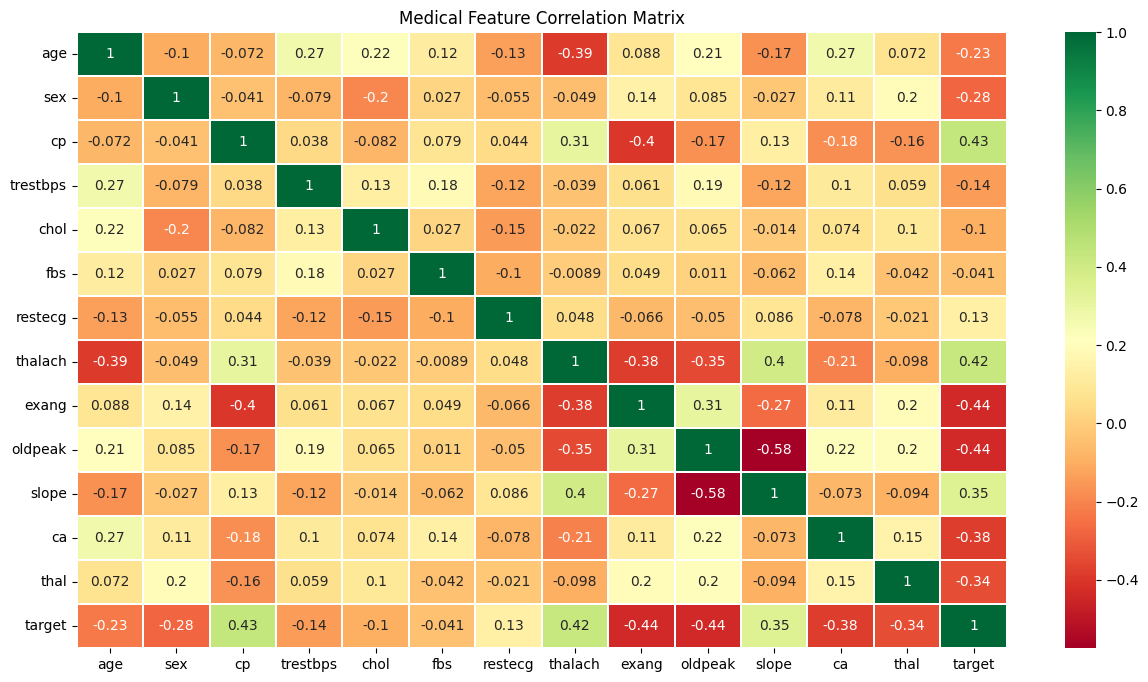

/tmp/ipykernel_17/1784660395.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='RdBu_r')


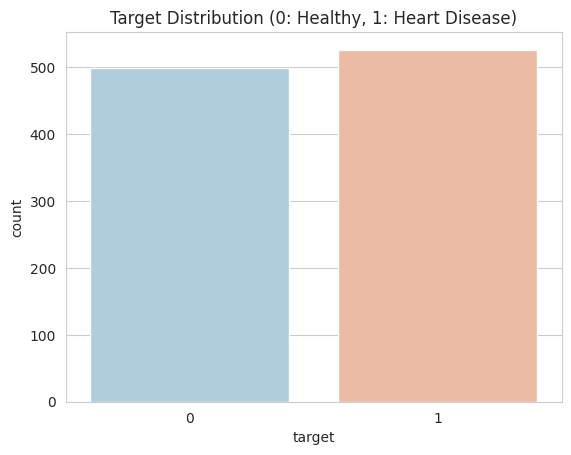

In [7]:
plt.figure(figsize=(15, 8))
# Correlation matrix to show the most important medical variables
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.title('Medical Feature Correlation Matrix')
plt.show()

# Target Distribution
sns.set_style('whitegrid')
sns.countplot(x='target', data=df, palette='RdBu_r')
plt.title('Target Distribution (0: Healthy, 1: Heart Disease)')
plt.show()

## 3. Advanced Model Optimization (Hyperparameter Tuning)
Instead of using default settings, we use **GridSearchCV** to find the optimal 'K' for KNN and the best 'Trees' for Random Forest.

In [8]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization (very important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Searching for the best teachers for KNN
knn_params = {'n_neighbors': np.arange(1, 30)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train_scaled, y_train)

print(f"✅ Best K for KNN: {knn_grid.best_params_}")

✅ Best K for KNN: {'n_neighbors': np.int64(1)}


## 4. Comparing Algorithms: KNN vs. Random Forest
We will now compare our tuned KNN model with a **Random Forest Classifier** to see which one handles the medical complexity better.

In [9]:
# Ranking of the strongest model: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) # Random Forest لا يحتاج لـ Scaling بالضرورة

# Predictions
knn_preds = knn_grid.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test)

# Results
print("🏆 KNN Performance:")
print(f"Accuracy: {accuracy_score(y_test, knn_preds):.2f}")
print(f"Recall: {recall_score(y_test, knn_preds):.2f}")

print("\n🌲 Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_preds):.2f}")
print(f"Recall: {recall_score(y_test, rf_preds):.2f}")

🏆 KNN Performance:
Accuracy: 0.99
Recall: 0.97

🌲 Random Forest Performance:
Accuracy: 0.99
Recall: 0.97


## 5. Medical Impact Evaluation
In cardiology, **Recall** is more important than Accuracy. We need to ensure we don't miss any sick patients.

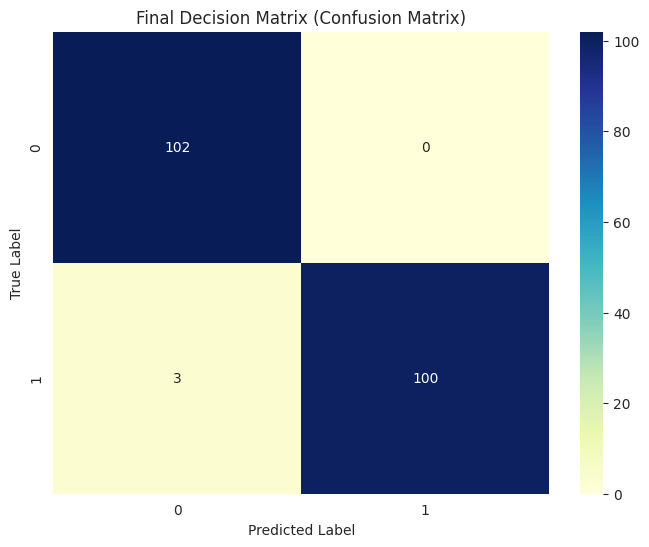

🔍 Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [10]:
# Drawing the confusion matrix for the best model
best_model_preds = rf_preds if accuracy_score(y_test, rf_preds) > accuracy_score(y_test, knn_preds) else knn_preds

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, best_model_preds), annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Final Decision Matrix (Confusion Matrix)')
plt.show()

print("🔍 Classification Report:\n")
print(classification_report(y_test, best_model_preds))